In [ ]:
# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import requests

import warnings

# Desabilitar todos os warnings
warnings.filterwarnings("ignore")

exportacao = pd.read_csv('Dados/Dados_Embrapa/Exportacao/ExpVinho.csv', sep=None, engine='python', encoding='utf-8')
exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# Visualizar o tamanho do dataframe Producao
print(f"Linhas da tabela Produção: {exportacao.shape[0]}")
print(f"Colunas da tabela Produção: {exportacao.shape[1]}")


colum_ness = exportacao.shape[1] - 30 # Verificar o número de colunas trazidas dado a separação entre quantidade e valor
print(f"Colunas da tabela Produção: {colum_ness}")

Linhas da tabela Produção: 141
Colunas da tabela Produção: 112
Colunas da tabela Produção: 82


In [105]:
# Pegando apenas as colunas impares que são referentes ao valor importado
exportacao_valor = exportacao.iloc[:, 1::2]
# corringindo o nome das colunas
exportacao_valor.columns = exportacao_valor.columns.str[:-2]
exportacao_valor.head()

,Pa,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,95,21,0,0,698,1783
2,"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,...,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,0,0,0,0,0,0,0,0,0,...,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
exportacao_qtd = exportacao.iloc[:, ::2]
exportacao_qtd.head()

,Id,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,26,4,0,0,117,103
2,3,0,0,4168,12000,0,0,0,0,0,...,10680,14012,15467,10794,3660,6261,2698,7630,4806,6666
3,4,0,0,0,0,0,0,0,0,0,...,1908,7359,10170,477,345,0,0,4068,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
exportacao_final_valor = pd.concat([exportacao_valor.iloc[:, :1], exportacao_valor.iloc[:, -15:]], axis=1)
exportacao_final_valor.head(10)
exportacao_final_valor = exportacao_final_valor.rename(columns={'Pa': 'País'})

exportacao_qtd = pd.concat([exportacao.iloc[:, :2], exportacao_qtd.iloc[:, -15:]], axis=1)
exportacao_qtd.head(10)

exportacao_final_valor.head(5)


,País,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,46,0,0,0
1,África do Sul,0,0,0,0,0,0,0,0,0,95,21,0,0,698,1783
2,"Alemanha, República Democrática",138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367,31853,48095
3,Angola,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0,4761,0,0
4,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
# Melt 
exportacao_melt_valor = pd.melt(
    exportacao_final_valor,
    id_vars=['País'],
    value_vars= exportacao_final_valor.iloc[:,-15:],
    var_name='Ano',
    value_name='Valor(US$)',
)

exportacao_melt_qtd = pd.melt(
    exportacao_qtd,
    id_vars=['País'],
    value_vars= exportacao_qtd.iloc[:,-15:],
    var_name='Ano',
    value_name='Quantidade',
)


In [109]:
#unindo as tabelas de quantidade importada e valor importado
exportacao = pd.merge(exportacao_melt_qtd,exportacao_melt_valor,on =['País','Ano'])
exportacao['Ano'] = exportacao['Ano'].astype(int)
exportacao.head()

,País,Ano,Quantidade,Valor(US$)
0,Afeganistão,2010,0,0
1,África do Sul,2010,0,0
2,"Alemanha, República Democrática",2010,27715,138666
3,Angola,2010,33557,189891
4,Anguilla,2010,0,0


In [110]:
exportacao.head()

,País,Ano,Quantidade,Valor(US$)
0,Afeganistão,2010,0,0
1,África do Sul,2010,0,0
2,"Alemanha, República Democrática",2010,27715,138666
3,Angola,2010,33557,189891
4,Anguilla,2010,0,0


In [111]:
# Pedido do Head


# 1. Criar a coluna "País de origem" com valor fixo "Brasil"
exportacao['País de origem'] = 'Brasil'

# 2. Renomear as colunas existentes para atender ao pedido
exportacao = exportacao.rename(columns={
    'País': 'País de destino',
    'Quantidade': 'Quantidade em litros',
    'Valor(US$)': 'Valor em US$'
})

# 3. Selecionar apenas as colunas necessárias (na ordem solicitada)
colunas_finais = [
    'País de origem',
    'País de destino',
    'Quantidade em litros',
    'Valor em US$'
]
exportacao_final = exportacao[colunas_finais]

# 4. Visualizar o resultado
exportacao_final.head()

,País de origem,País de destino,Quantidade em litros,Valor em US$
0,Brasil,Afeganistão,0,0
1,Brasil,África do Sul,0,0
2,Brasil,"Alemanha, República Democrática",27715,138666
3,Brasil,Angola,33557,189891
4,Brasil,Anguilla,0,0


In [112]:
import yfinance as yf
import pandas as pd
# Baixar dados do USD-BRL
dolar_yahoo = yf.download("USDBRL=X", start="2009-01-01")['Close']

# Converter para DataFrame
dolar_yahoo = dolar_yahoo.reset_index()
dolar_yahoo.columns = ['data', 'cotacao']

# Converter 'data' para datetime e extrair o ano
dolar_yahoo['data'] = pd.to_datetime(dolar_yahoo['data'])
dolar_yahoo['ano'] = dolar_yahoo['data'].dt.year

# Calcular média anual
media_anual = dolar_yahoo.groupby('ano')['cotacao'].mean().reset_index()

# Saída formatada
media_anual.columns = ['Ano', 'Cotação Média (USD-BRL)']

media_anual.head()

[*********************100%***********************]  1 of 1 completed


,Ano,Cotação Média (USD-BRL)
0,2009,1.988851
1,2010,1.754732
2,2011,1.669180
3,2012,1.952577
4,2013,2.154575


In [113]:
dados_finais = pd.merge(exportacao, media_anual, on='Ano', how='left')
dados_finais.head()

,País de destino,Ano,Quantidade em litros,Valor em US$,País de origem,Cotação Média (USD-BRL)
0,Afeganistão,2010,0,0,Brasil,1.754732
1,África do Sul,2010,0,0,Brasil,1.754732
2,"Alemanha, República Democrática",2010,27715,138666,Brasil,1.754732
3,Angola,2010,33557,189891,Brasil,1.754732
4,Anguilla,2010,0,0,Brasil,1.754732


In [114]:
dados_agrupados = dados_finais.groupby('Ano').agg({
    'Quantidade em litros': 'sum',
    'Valor em US$': 'sum',
    'Cotação Média (USD-BRL)': 'mean'
}).reset_index()


<Figure size 1400x800 with 0 Axes>

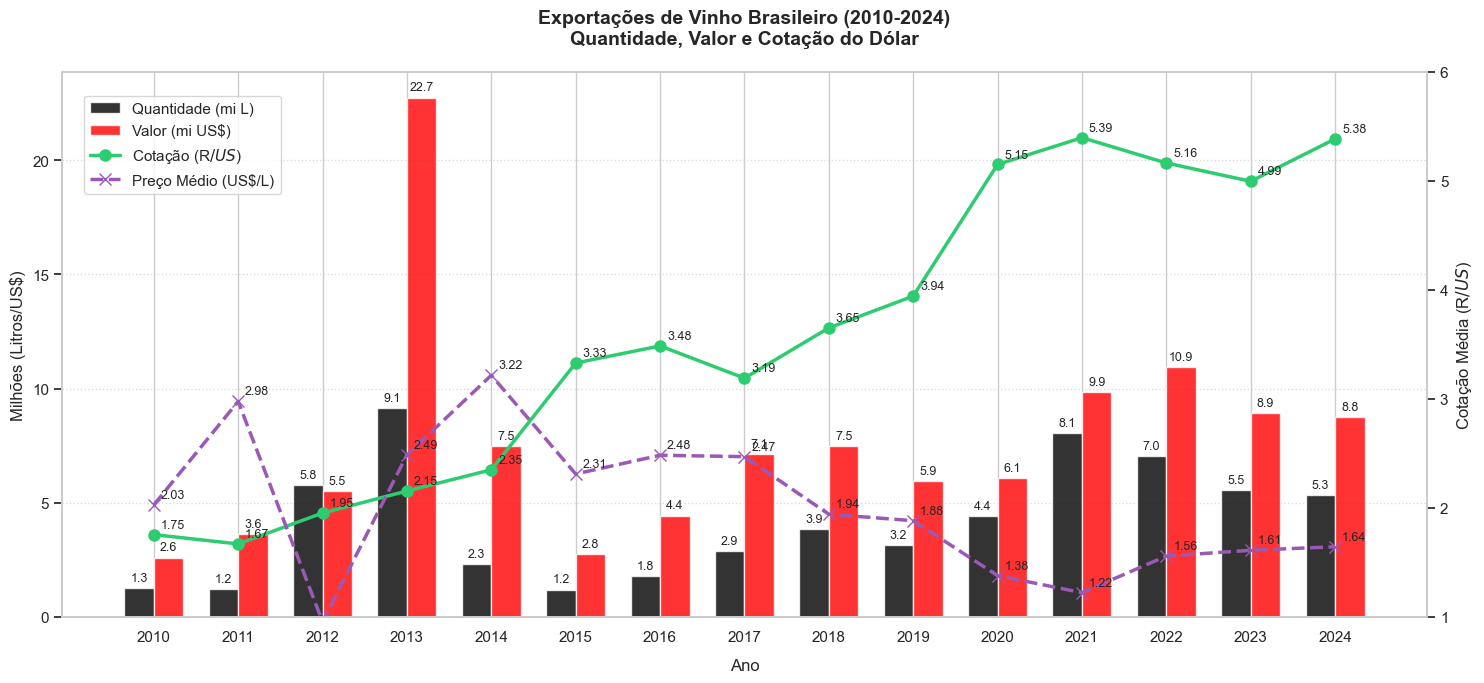

In [115]:

dados = dados_agrupados

# Configurações do estilo
#plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(15, 7))

# Converter para milhões
dados['Quant (mi L)'] = dados['Quantidade em litros'] / 1e6
dados['Valor (mi US$)'] = dados['Valor em US$'] / 1e6
dados['Preço Médio (US$/L)'] = dados['Valor (mi US$)'] / dados['Quant (mi L)']

# Gráfico de barras agrupadas
width = 0.35  # Largura das barras
x = dados['Ano']

bar1 = ax1.bar(x - width/2, dados['Quant (mi L)'], width, 
               color="#000000", alpha=0.8, label='Quantidade (mi L)')
bar2 = ax1.bar(x + width/2, dados['Valor (mi US$)'], width, 
               color="#ff0000", alpha=0.8, label='Valor (mi US$)')

# Configurações do eixo primário
ax1.set_xlabel('Ano', fontsize=12, labelpad=10)
ax1.set_ylabel('Milhões (Litros/US$)', fontsize=12)
ax1.set_xticks(x)
ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax1.grid(axis='y', linestyle=':', alpha=0.7)

# Eixo secundário para cotação
ax2 = ax1.twinx()
line = ax2.plot(x, dados['Cotação Média (USD-BRL)'], 
                color='#2ecc71', marker='o', linewidth=2.5, 
                markersize=8, label='Cotação (R$/US$)')

line2 = ax2.plot(x, dados['Preço Médio (US$/L)'],
                color='#9b59b6', linestyle='--', marker='x', 
                linewidth=2.5, markersize=8, label='Preço Médio (US$/L)')

# Configurações do eixo secundário
ax2.set_ylabel('Cotação Média (R$/US$)', fontsize=12)
ax2.set_ylim(1, 6)
ax2.grid(visible=False)

# Adicionar valores nas barras (apenas para valores relevantes)
for rect in bar1 + bar2:
    height = rect.get_height()
    if height > 0:  # Só mostra label se o valor for > 0
        ax1.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

# Adicionar valores na linha de cotação
for i, txt in enumerate(dados['Cotação Média (USD-BRL)']):
    ax2.annotate(f'{txt:.2f}', 
                 (x[i], dados['Cotação Média (USD-BRL)'][i]), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='left',
                 fontsize=9)
    
for i, txt in enumerate(dados['Preço Médio (US$/L)']):
    ax2.annotate(f'{txt:.2f}', 
                 (x[i], dados['Preço Médio (US$/L)'][i]), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='left',
                 fontsize=9)

# Título e legendas
plt.title('Exportações de Vinho Brasileiro (2010-2024)\nQuantidade, Valor e Cotação do Dólar', 
          fontsize=14, pad=20, fontweight='bold')

# Unir legendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', 
           bbox_to_anchor=(0.01, 0.97),
           frameon=True)

# Ajustar layout
plt.tight_layout()
plt.show()

In [ ]:

# Filtrar dados entre 2009 e 2023
df_brasil_filtered = exportacao[exportacao["Ano"].between(2010, 2024)]
# Reordenar os dados do maior para o menor explicitamente (apesar de já estarem assim por .sort_values())
top5_destinos_mm = top5_destinos_mm.sort_values()
top5_valor_mm = top5_valor_mm.sort_values()

# Gráfico 1 ajustado: Volume em litros exportados (MM)
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_destinos_mm.index, top5_destinos_mm.values, color="red", height=0.4)

# Adicionar rótulos com valor, em negrito e branco
for bar in bars:
    plt.text(bar.get_width() * 0.98, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f} MM', va='center', ha='right',
             fontsize=10, fontweight='bold', color='white')

# Formatação
plt.title("Top 5 Países de Destino das Exportações de Vinho do Brasil (2009–2023)", fontsize=14)
plt.xticks([])  # Remove notação eixo x
plt.yticks(fontsize=10)
plt.grid(False)
plt.xlim(0, top5_destinos_mm.max() * 1.3)
plt.tight_layout()
plt.show()

# Gráfico 2 ajustado: Valor exportado (MM US$)
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_valor_mm.index, top5_valor_mm.values, color="red", height=0.4)

# Adicionar rótulos com valor, em negrito e branco
for bar in bars:
    plt.text(bar.get_width() * 0.98, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f} MM', va='center', ha='right',
             fontsize=10, fontweight='bold', color='white')

# Formatação
plt.title("Top 5 Países de Destino por Valor Exportado de Vinho do Brasil (2009–2023)", fontsize=14)
plt.xticks([])  # Remove notação eixo x
plt.yticks(fontsize=10)
plt.grid(False)
plt.xlim(0, top5_valor_mm.max() * 1.3)
plt.tight_layout()
plt.show()

In [ ]:


# Identificar os top 5 países por volume total exportado
top5_destinos = df_brasil_filtered.groupby("País de destino")["Quantidade em litros"].sum().sort_values(ascending=False).head(5)
top5_paises = top5_destinos.index.tolist()

# Filtrar os dados do top 5
df_top5 = df_brasil_filtered[df_brasil_filtered["País de destino"].isin(top5_paises)]

# Agrupar por ano e país, somando quantidade e valor
evolucao = df_top5.groupby(["Ano", "País de destino"])[["Quantidade em litros", "Valor em US$"]].sum().reset_index()

# Pivotar para colocar ANOS como colunas e PAÍSES como linhas
pivot_quantidade = evolucao.pivot(index="Ano", columns="País de destino", values="Quantidade em litros")
pivot_valor = evolucao.pivot(index="Ano", columns="País de destino", values="Valor em US$")

# Adicionar total por ano (soma das colunas)
pivot_quantidade["Total (Litros)"] = pivot_quantidade.sum(axis=1)
pivot_valor["Total (US$)"] = pivot_valor.sum(axis=1)

# Arredondar os dados
pivot_quantidade = pivot_quantidade.round(0).astype("Int64")
pivot_valor = pivot_valor.round(0).astype("Int64")

# Transpor para colocar países como linhas
pivot_qtde_transposta = pivot_quantidade.drop(columns="Total (Litros)").T
pivot_valor_transposta = pivot_valor.drop(columns="Total (US$)").T

# Adicionar total por país
pivot_qtde_transposta["Total por País (Litros)"] = pivot_qtde_transposta.sum(axis=1)
pivot_valor_transposta["Total por País (US$)"] = pivot_valor_transposta.sum(axis=1)

# Variação percentual do último ano (2023 vs 2022)
pivot_qtde_transposta["Variação Último Ano (%)"] = (
    (pivot_qtde_transposta[2023] - pivot_qtde_transposta[2022]) / pivot_qtde_transposta[2022] * 100
).round(2)

pivot_valor_transposta["Variação Último Ano (%)"] = (
    (pivot_valor_transposta[2023] - pivot_valor_transposta[2022]) / pivot_valor_transposta[2022] * 100
).round(2)

# ================================
# Corrigir o Total com base em TODOS os países (Brasil)
# ================================

# Totais globais por ano (todos os países)
total_geral_qtde = df_brasil_filtered.groupby("Ano")["Quantidade em litros"].sum()
total_geral_valor = df_brasil_filtered.groupby("Ano")["Valor em US$"].sum()

# Inserir linha 'Total (Litros)' e 'Total (US$)' com valores globais por ano
pivot_qtde_transposta.loc["Total (Litros)"] = 0
pivot_valor_transposta.loc["Total (US$)"] = 0

for ano in total_geral_qtde.index:
    pivot_qtde_transposta.at["Total (Litros)", ano] = total_geral_qtde.loc[ano]
    pivot_valor_transposta.at["Total (US$)", ano] = total_geral_valor.loc[ano]

# Atualizar total por país (soma de todos os anos)
pivot_qtde_transposta.at["Total (Litros)", "Total por País (Litros)"] = total_geral_qtde.sum()
pivot_valor_transposta.at["Total (US$)", "Total por País (US$)"] = total_geral_valor.sum()

# Atualizar variação do último ano para o total
pivot_qtde_transposta.at["Total (Litros)", "Variação Último Ano (%)"] = (
    (total_geral_qtde.loc[2023] - total_geral_qtde.loc[2022]) / total_geral_qtde.loc[2022] * 100
).round(2)

pivot_valor_transposta.at["Total (US$)", "Variação Último Ano (%)"] = (
    (total_geral_valor.loc[2023] - total_geral_valor.loc[2022]) / total_geral_valor.loc[2022] * 100
).round(2)


In [ ]:
pivot_valor_transposta.head(10)

In [ ]:
pivot_qtde_transposta.head(10)

In [ ]:
exportacao.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
exportacao['Ano'] = exportacao['Ano'].astype(int)
# Criar coluna de período com indexação booleana vetorizada
exportacao["Período"] = np.where(exportacao["Ano"] <= 2017, "2009–2017", "2017–2023")

# Agrupar por país e período
tabela = exportacao.groupby(["País de destino", "Período"])["Quantidade em litros"].sum().unstack(fill_value=0)

# Selecionar top 7 países com maior volume total
totais = tabela.sum(axis=1)
tabela = tabela.loc[totais.nlargest(7).index]

# Ordenar do maior para o menor e inverter para maior no topo
ordem = tabela.sum(axis=1).sort_values(ascending=False).index[::-1]
tabela = tabela.loc[ordem]

# Converter para milhões
tabela_milhoes = tabela / 1_000_000

# Plotar gráfico
ax = tabela_milhoes.plot(kind="barh", stacked=True, figsize=(12, 6), color=["gray", "black"])

# Coordenadas dos centros para os rótulos internos
centros = tabela_milhoes.cumsum(axis=1) - tabela_milhoes / 2

# Expandir coordenadas em arrays vetorizados
x_coords = centros.to_numpy().flatten()
y_coords = np.repeat(np.arange(len(centros)), centros.shape[1])
labels = tabela_milhoes.to_numpy().flatten()

# Criar máscara de rótulos visíveis (> 0)
mask = labels > 0
x_coords_visible = x_coords[mask]
y_coords_visible = y_coords[mask]
labels_visible = np.round(labels[mask], 1).astype(str)

# Determinar cores (segunda coluna recebe branco)
cor_rótulos = np.tile(np.array(["black", "white"]), len(tabela))[:len(labels)]
cor_rótulos_visíveis = cor_rótulos[mask]

# Adicionar rótulos internos vetorizadamente
for i in range(len(labels_visible)):
    ax.annotate(labels_visible[i], (x_coords_visible[i], y_coords_visible[i]),
                ha='center', va='center', fontsize=12, fontweight='bold', color=cor_rótulos_visíveis[i])

# Rótulo total final
totais_finais = tabela_milhoes.sum(axis=1).to_numpy()
x_totais = totais_finais + 0.5
y_totais = np.arange(len(totais_finais))
label_totais = np.round(totais_finais, 1).astype(str) + " MM"

# Adicionar rótulos totais vetorizadamente
for i in range(len(label_totais)):
    ax.annotate(label_totais[i], (x_totais[i], y_totais[i]),
                ha='left', va='center', fontsize=8, fontweight='bold', color='black')

# Estilo do gráfico
plt.title("Importações de Vinho por País de Origem (2009–2017 vs 2017–2023)")
plt.xlabel("Milhões de Litros")
plt.ylabel("País")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='x', visible=False)
plt.grid(axis='y', visible=False)
plt.grid(axis='x', linestyle= '--', alpha=0.5,visible=False)
plt.tight_layout()
plt.show()

In [ ]:
exportacao.head()

In [ ]:
# Estatisticas
exportacao['Ano'] = exportacao['Ano'].astype(int)
exportacao["Período"] = np.where(exportacao["Ano"] <= 2017, "2009–2017", "2018–2023")
# 4. Calcular o volume total exportado por país e período
soma_por_pais_periodo = exportacao.groupby(["Período", "País de destino"])["Quantidade em litros"].sum()

# 5. Transformar em tabela com países nas colunas e períodos nas linhas
tabela_volume = soma_por_pais_periodo.unstack().fillna(0)

# 6. Calcular o share (%) por país em cada período
tabela_share_percentual = tabela_volume.divide(tabela_volume.sum(axis=1), axis=0) * 100
tabela_share_percentual = tabela_share_percentual.round(2)

# 7. Identificar os Top 5 países com maior participação em cada período
top5_2009_2017 = tabela_share_percentual.loc["2009–2017"].sort_values(ascending=True).head(10).index
top5_2018_2023 = tabela_share_percentual.loc["2018–2023"].sort_values(ascending=True).head(10).index
top_paises = pd.Index(top5_2009_2017).union(top5_2018_2023)

# 8. Filtrar e transpor a tabela para ter países nas linhas e períodos nas colunas
tabela_share_ordenada = tabela_share_percentual[top_paises].T
tabela_share_ordenada.head()